In [189]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import random
import requests
import datetime
import os
import holidays
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
"""
Complete End-to-End Time Series Analysis for Complaint Count Prediction
==========================================================================
This script performs comprehensive analysis and prediction using multiple models
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Statistical and ML libraries
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Time series specific libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping





In [191]:
# Define the file paths
path1 = r'C:\Users\TPWODL\New folder_Content\TimeSeriesForecasting_End_To_End\data\raw\twitter_x_timeseries_forcast.csv'
path2 = r'C:\Users\LENOVO\MachineLearningProhects\TimeSeriesForecasting_End_To_End\data\twitter_x_timeseries_forcast.csv'

# Check which path exists and read CSV
if os.path.exists(path1):
    df = pd.read_csv(path1) 
elif os.path.exists(path2):
    df = pd.read_csv(path2)   
else:
    # Raise a FileNotFoundError if neither path is valid
    raise FileNotFoundError("❌ No valid data file found in either specified path.")

In [192]:
df.head()

,SLNO,time,temp_max_C,temp_min_C,temp_mean_C,precip_mm,wind_speed_max_m_s,weather_code,heavy_rain_flag,thunderstorm_flag,Complaint_Count
0,0,10-06-2022,41.0,30.3,34.6,0.1,16.6,51,0,0,10
1,1,11-06-2022,41.0,30.8,34.8,0.2,25.3,51,0,0,12
2,2,12-06-2022,39.8,29.5,34.4,0.0,16.7,3,0,0,5
3,3,13-06-2022,40.2,29.5,34.7,0.0,13.3,3,0,0,15
4,4,14-06-2022,39.2,30.0,32.9,8.6,19.0,63,0,0,16


In [193]:
df['time'] = pd.to_datetime(df['time'], dayfirst=True, errors='coerce')


In [194]:
df

,SLNO,time,temp_max_C,temp_min_C,temp_mean_C,precip_mm,wind_speed_max_m_s,weather_code,heavy_rain_flag,thunderstorm_flag,Complaint_Count
0,0,2022-06-10,41.0,30.3,34.6,0.1,16.6,51,0,0,10
1,1,2022-06-11,41.0,30.8,34.8,0.2,25.3,51,0,0,12
2,2,2022-06-12,39.8,29.5,34.4,0.0,16.7,3,0,0,5
3,3,2022-06-13,40.2,29.5,34.7,0.0,13.3,3,0,0,15
4,4,2022-06-14,39.2,30.0,32.9,8.6,19.0,63,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...
1223,1223,2025-10-15,31.4,22.4,26.4,0.0,6.1,0,0,0,18
1224,1224,2025-10-16,30.9,22.2,25.9,0.0,8.2,0,0,0,18
1225,1225,2025-10-17,31.0,21.7,25.5,0.0,7.8,0,0,0,17
1226,1226,2025-10-18,30.5,20.6,25.5,0.0,6.3,0,0,0,37


In [195]:
# ===== CORE TIME FEATURES =====
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek
df['day_of_month'] = df['time'].dt.day
df['week_of_year'] = df['time'].dt.isocalendar().week.astype(int)
df['month'] = df['time'].dt.month
df['quarter'] = df['time'].dt.quarter
df['year'] = df['time'].dt.year
df['day_of_year'] = df['time'].dt.dayofyear
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

In [196]:
df

,SLNO,time,temp_max_C,temp_min_C,temp_mean_C,precip_mm,wind_speed_max_m_s,weather_code,heavy_rain_flag,thunderstorm_flag,Complaint_Count,hour,day_of_week,day_of_month,week_of_year,month,quarter,year,day_of_year,is_weekend
0,0,2022-06-10,41.0,30.3,34.6,0.1,16.6,51,0,0,10,0,4,10,23,6,2,2022,161,0
1,1,2022-06-11,41.0,30.8,34.8,0.2,25.3,51,0,0,12,0,5,11,23,6,2,2022,162,1
2,2,2022-06-12,39.8,29.5,34.4,0.0,16.7,3,0,0,5,0,6,12,23,6,2,2022,163,1
3,3,2022-06-13,40.2,29.5,34.7,0.0,13.3,3,0,0,15,0,0,13,24,6,2,2022,164,0
4,4,2022-06-14,39.2,30.0,32.9,8.6,19.0,63,0,0,16,0,1,14,24,6,2,2022,165,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,1223,2025-10-15,31.4,22.4,26.4,0.0,6.1,0,0,0,18,0,2,15,42,10,4,2025,288,0
1224,1224,2025-10-16,30.9,22.2,25.9,0.0,8.2,0,0,0,18,0,3,16,42,10,4,2025,289,0
1225,1225,2025-10-17,31.0,21.7,25.5,0.0,7.8,0,0,0,17,0,4,17,42,10,4,2025,290,0
1226,1226,2025-10-18,30.5,20.6,25.5,0.0,6.3,0,0,0,37,0,5,18,42,10,4,2025,291,1


In [197]:
df.drop(columns='SLNO', inplace=True)

In [198]:
df

,time,temp_max_C,temp_min_C,temp_mean_C,precip_mm,wind_speed_max_m_s,weather_code,heavy_rain_flag,thunderstorm_flag,Complaint_Count,hour,day_of_week,day_of_month,week_of_year,month,quarter,year,day_of_year,is_weekend
0,2022-06-10,41.0,30.3,34.6,0.1,16.6,51,0,0,10,0,4,10,23,6,2,2022,161,0
1,2022-06-11,41.0,30.8,34.8,0.2,25.3,51,0,0,12,0,5,11,23,6,2,2022,162,1
2,2022-06-12,39.8,29.5,34.4,0.0,16.7,3,0,0,5,0,6,12,23,6,2,2022,163,1
3,2022-06-13,40.2,29.5,34.7,0.0,13.3,3,0,0,15,0,0,13,24,6,2,2022,164,0
4,2022-06-14,39.2,30.0,32.9,8.6,19.0,63,0,0,16,0,1,14,24,6,2,2022,165,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,2025-10-15,31.4,22.4,26.4,0.0,6.1,0,0,0,18,0,2,15,42,10,4,2025,288,0
1224,2025-10-16,30.9,22.2,25.9,0.0,8.2,0,0,0,18,0,3,16,42,10,4,2025,289,0
1225,2025-10-17,31.0,21.7,25.5,0.0,7.8,0,0,0,17,0,4,17,42,10,4,2025,290,0
1226,2025-10-18,30.5,20.6,25.5,0.0,6.3,0,0,0,37,0,5,18,42,10,4,2025,291,1


### Core Data Checks (Minimal & Essential)

In [199]:
# 1. Check column names
print(df.columns.tolist())

# 2. Preview data
print(df.head(2))
print(df.shape)

# 3. Check for missing values
print(df.isna().sum())

# 4. Confirm datetime column exists and is properly parsed
print(df['time'].dtype)  # Should be datetime64[ns]

# Optional: Check for unparsed datetime entries
print(df['time'].isna().sum())


['time', 'temp_max_C', 'temp_min_C', 'temp_mean_C', 'precip_mm', 'wind_speed_max_m_s', 'weather_code', 'heavy_rain_flag', 'thunderstorm_flag', 'Complaint_Count', 'hour', 'day_of_week', 'day_of_month', 'week_of_year', 'month', 'quarter', 'year', 'day_of_year', 'is_weekend']
        time  temp_max_C  temp_min_C  temp_mean_C  precip_mm  \
0 2022-06-10        41.0        30.3         34.6        0.1   
1 2022-06-11        41.0        30.8         34.8        0.2   

   wind_speed_max_m_s  weather_code  heavy_rain_flag  thunderstorm_flag  \
0                16.6            51                0                  0   
1                25.3            51                0                  0   

   Complaint_Count  hour  day_of_week  day_of_month  week_of_year  month  \
0               10     0            4            10            23      6   
1               12     0            5            11            23      6   

   quarter  year  day_of_year  is_weekend  
0        2  2022          161     

### General Information Check

In [200]:
# Overview of data types and non-null counts
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Check memory usage
print(df.memory_usage(deep=True))

print(df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                1228 non-null   datetime64[ns]
 1   temp_max_C          1228 non-null   float64       
 2   temp_min_C          1228 non-null   float64       
 3   temp_mean_C         1228 non-null   float64       
 4   precip_mm           1228 non-null   float64       
 5   wind_speed_max_m_s  1228 non-null   float64       
 6   weather_code        1228 non-null   int64         
 7   heavy_rain_flag     1228 non-null   int64         
 8   thunderstorm_flag   1228 non-null   int64         
 9   Complaint_Count     1228 non-null   int64         
 10  hour                1228 non-null   int32         
 11  day_of_week         1228 non-null   int32         
 12  day_of_month        1228 non-null   int32         
 13  week_of_year        1228 non-null   int64       

In [201]:
df.duplicated().sum()

np.int64(0)

In [202]:
df.describe()

,time,temp_max_C,temp_min_C,temp_mean_C,precip_mm,wind_speed_max_m_s,weather_code,heavy_rain_flag,thunderstorm_flag,Complaint_Count,hour,day_of_week,day_of_month,week_of_year,month,quarter,year,day_of_year,is_weekend
count,1228,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.0,1228.000000,1228.0,1228.000000,1228.000000,1228.00000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000
mean,2024-02-13 12:00:00,32.138355,21.951140,26.588599,5.645847,12.762622,30.630293,0.014658,0.0,25.571661,0.0,3.004886,15.724756,27.19544,6.676710,2.559446,2023.606678,187.824919,0.286645
min,2022-06-10 00:00:00,21.000000,9.600000,16.600000,0.000000,5.500000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,1.000000,1.00000,1.000000,1.000000,2022.000000,1.000000,0.000000
25%,2023-04-12 18:00:00,29.400000,18.500000,24.100000,0.000000,9.500000,3.000000,0.000000,0.0,10.000000,0.0,1.000000,8.000000,15.00000,4.000000,2.000000,2023.000000,103.000000,0.000000
50%,2024-02-13 12:00:00,31.350000,24.000000,26.900000,0.100000,11.800000,51.000000,0.000000,0.0,19.000000,0.0,3.000000,16.000000,28.00000,7.000000,3.000000,2024.000000,194.000000,0.000000
75%,2024-12-16 06:00:00,34.000000,25.100000,28.600000,5.725000,15.300000,63.000000,0.000000,0.0,34.000000,0.0,5.000000,23.000000,39.00000,9.000000,3.000000,2024.000000,271.000000,1.000000
max,2025-10-19 00:00:00,45.200000,32.700000,38.300000,154.800000,35.300000,65.000000,1.000000,0.0,181.000000,0.0,6.000000,31.000000,52.00000,12.000000,4.000000,2025.000000,366.000000,1.000000
std,NaN,4.291665,4.592986,4.141830,12.035461,4.337403,28.983065,0.120229,0.0,22.271619,0.0,2.001216,8.774127,14.41681,3.317319,1.081315,1.024168,101.347970,0.452378


In [203]:
correlation_matrix = df.corr()

In [204]:
correlation_matrix

,time,temp_max_C,temp_min_C,temp_mean_C,precip_mm,wind_speed_max_m_s,weather_code,heavy_rain_flag,thunderstorm_flag,Complaint_Count,hour,day_of_week,day_of_month,week_of_year,month,quarter,year,day_of_year,is_weekend
time,1.000000,0.055204,0.098215,0.082086,0.027748,0.078307,0.036148,-0.005849,NaN,0.553641,NaN,0.001409,-0.008558,-0.050976,-0.055193,-0.056455,0.962722,-0.054888,0.000894
temp_max_C,0.055204,1.000000,0.638914,0.904602,-0.218767,0.434599,-0.131637,-0.110235,NaN,0.365313,NaN,-0.006038,-0.017220,-0.312882,-0.314517,-0.331196,0.138403,-0.317644,-0.000840
temp_min_C,0.098215,0.638914,1.000000,0.897391,0.268671,0.491785,0.558141,0.070074,NaN,0.462581,NaN,-0.011802,-0.017033,0.071797,0.073298,0.066570,0.074552,0.068430,-0.011925
temp_mean_C,0.082086,0.904602,0.897391,1.000000,0.018799,0.500930,0.218998,-0.017667,NaN,0.443831,NaN,-0.007712,-0.023405,-0.139857,-0.139484,-0.151270,0.116909,-0.144288,-0.004388
precip_mm,0.027748,-0.218767,0.268671,0.018799,1.000000,0.209312,0.531925,0.632154,NaN,0.176319,NaN,-0.012235,-0.026664,0.137466,0.138908,0.139376,-0.010378,0.135225,-0.022250
wind_speed_max_m_s,0.078307,0.434599,0.491785,0.500930,0.209312,1.000000,0.230030,0.123267,NaN,0.324915,NaN,0.018715,-0.012205,-0.204542,-0.205601,-0.216642,0.130618,-0.208176,0.004136
weather_code,0.036148,-0.131637,0.558141,0.218998,0.531925,0.230030,1.000000,0.143291,NaN,0.229924,NaN,0.013324,0.020207,0.257724,0.254640,0.247698,-0.034610,0.254033,0.024064
heavy_rain_flag,-0.005849,-0.110235,0.070074,-0.017667,0.632154,0.123267,0.143291,1.000000,NaN,0.087569,NaN,-0.013847,-0.039437,0.027028,0.030282,0.030906,-0.012709,0.026363,-0.017376
thunderstorm_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Complaint_Count,0.553641,0.365313,0.462581,0.443831,0.176319,0.324915,0.229924,0.087569,NaN,1.000000,NaN,-0.018623,0.028173,-0.047699,-0.057384,-0.072649,0.539884,-0.055884,-0.015954


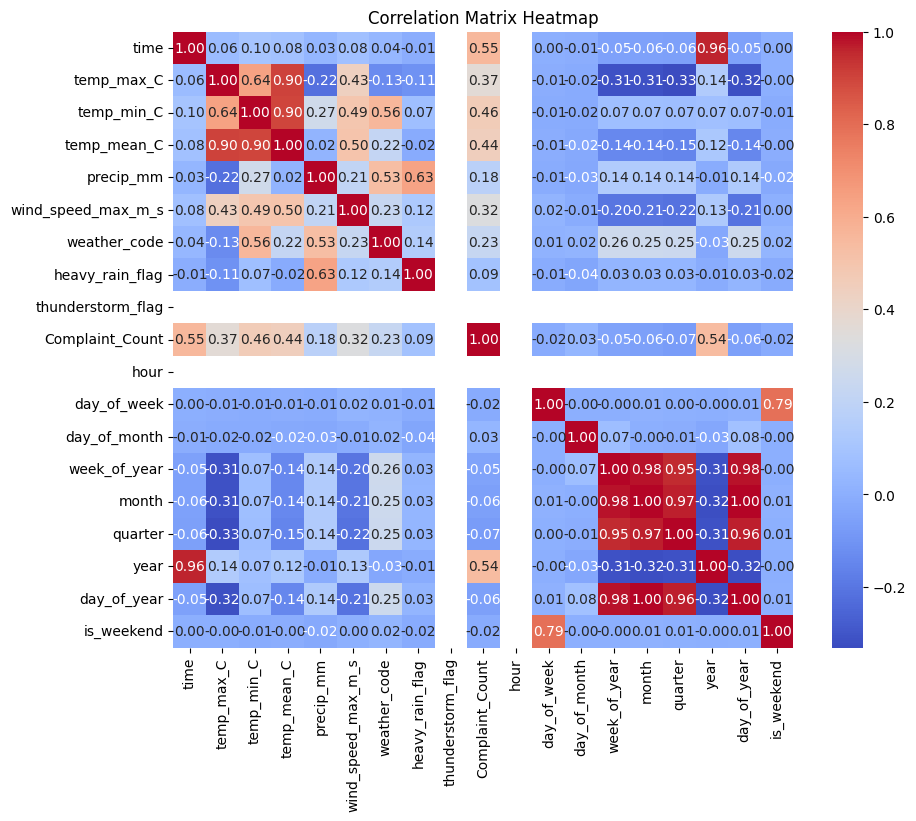

In [205]:
# 2. Pass the matrix to the seaborn heatmap function
plt.figure(figsize=(10, 8)) # Optional: set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [206]:
df.tail(2)

,time,temp_max_C,temp_min_C,temp_mean_C,precip_mm,wind_speed_max_m_s,weather_code,heavy_rain_flag,thunderstorm_flag,Complaint_Count,hour,day_of_week,day_of_month,week_of_year,month,quarter,year,day_of_year,is_weekend
1226,2025-10-18,30.5,20.6,25.5,0.0,6.3,0,0,0,37,0,5,18,42,10,4,2025,291,1
1227,2025-10-19,30.2,22.6,25.9,0.6,9.4,51,0,0,42,0,6,19,42,10,4,2025,292,1


In [207]:
df.shape

(1228, 19)

In [208]:
import requests
import pandas as pd

# Define location and date range
latitude = 21.4669
longitude = 83.9812
start_date = "2022-06-10"
end_date = "2025-10-19"

# Open-Meteo API endpoint for daily humidity
url = (
    f"https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    f"&start_date={start_date}&end_date={end_date}"
    f"&daily=relative_humidity_2m_mean&timezone=Asia%2FKolkata"
)

# Fetch and parse data
response = requests.get(url)
data = response.json()

# Check and convert to DataFrame
if 'daily' in data:
    df2 = pd.DataFrame(data['daily'])
    df2['time'] = pd.to_datetime(df2['time'])
    print(df2[['time', 'relative_humidity_2m_mean']])
else:
    print("No daily humidity data found. Check location, date, or API response.")



           time  relative_humidity_2m_mean
0    2022-06-10                         47
1    2022-06-11                         42
2    2022-06-12                         45
3    2022-06-13                         45
4    2022-06-14                         52
...         ...                        ...
1223 2025-10-15                         78
1224 2025-10-16                         75
1225 2025-10-17                         75
1226 2025-10-18                         77
1227 2025-10-19                         85

[1228 rows x 2 columns]


In [209]:
df2

,time,relative_humidity_2m_mean
0,2022-06-10,47
1,2022-06-11,42
2,2022-06-12,45
3,2022-06-13,45
4,2022-06-14,52
...,...,...
1223,2025-10-15,78
1224,2025-10-16,75
1225,2025-10-17,75
1226,2025-10-18,77


In [210]:
df.columns

Index(['time', 'temp_max_C', 'temp_min_C', 'temp_mean_C', 'precip_mm',
       'wind_speed_max_m_s', 'weather_code', 'heavy_rain_flag',
       'thunderstorm_flag', 'Complaint_Count', 'hour', 'day_of_week',
       'day_of_month', 'week_of_year', 'month', 'quarter', 'year',
       'day_of_year', 'is_weekend'],
      dtype='object')

In [211]:
df2.columns

Index(['time', 'relative_humidity_2m_mean'], dtype='object')

In [212]:
df_combined = pd.merge(df, df2, on='time', how='left')

In [213]:
df_combined

,time,temp_max_C,temp_min_C,temp_mean_C,precip_mm,wind_speed_max_m_s,weather_code,heavy_rain_flag,thunderstorm_flag,Complaint_Count,hour,day_of_week,day_of_month,week_of_year,month,quarter,year,day_of_year,is_weekend,relative_humidity_2m_mean
0,2022-06-10,41.0,30.3,34.6,0.1,16.6,51,0,0,10,0,4,10,23,6,2,2022,161,0,47
1,2022-06-11,41.0,30.8,34.8,0.2,25.3,51,0,0,12,0,5,11,23,6,2,2022,162,1,42
2,2022-06-12,39.8,29.5,34.4,0.0,16.7,3,0,0,5,0,6,12,23,6,2,2022,163,1,45
3,2022-06-13,40.2,29.5,34.7,0.0,13.3,3,0,0,15,0,0,13,24,6,2,2022,164,0,45
4,2022-06-14,39.2,30.0,32.9,8.6,19.0,63,0,0,16,0,1,14,24,6,2,2022,165,0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,2025-10-15,31.4,22.4,26.4,0.0,6.1,0,0,0,18,0,2,15,42,10,4,2025,288,0,78
1224,2025-10-16,30.9,22.2,25.9,0.0,8.2,0,0,0,18,0,3,16,42,10,4,2025,289,0,75
1225,2025-10-17,31.0,21.7,25.5,0.0,7.8,0,0,0,17,0,4,17,42,10,4,2025,290,0,75
1226,2025-10-18,30.5,20.6,25.5,0.0,6.3,0,0,0,37,0,5,18,42,10,4,2025,291,1,77


In [214]:
df_combined.isnull().sum()

time                         0
temp_max_C                   0
temp_min_C                   0
temp_mean_C                  0
precip_mm                    0
wind_speed_max_m_s           0
weather_code                 0
heavy_rain_flag              0
thunderstorm_flag            0
Complaint_Count              0
hour                         0
day_of_week                  0
day_of_month                 0
week_of_year                 0
month                        0
quarter                      0
year                         0
day_of_year                  0
is_weekend                   0
relative_humidity_2m_mean    0
dtype: int64

In [215]:
df_combined.columns

Index(['time', 'temp_max_C', 'temp_min_C', 'temp_mean_C', 'precip_mm',
       'wind_speed_max_m_s', 'weather_code', 'heavy_rain_flag',
       'thunderstorm_flag', 'Complaint_Count', 'hour', 'day_of_week',
       'day_of_month', 'week_of_year', 'month', 'quarter', 'year',
       'day_of_year', 'is_weekend', 'relative_humidity_2m_mean'],
      dtype='object')

In [216]:
# ================================================================
# 2️⃣ RULE-BASED CLASSIFICATION (IMD + Odisha logic)
# ================================================================
def classify_weather(row):
    precip = row.get('precip_mm', 0)
    wind = row.get('wind_speed_max_m_s', 0)
    hum = row.get('relative_humidity_2m_mean', 0)
    weather = str(row.get('weather_code', '')).lower()

    if (precip == 0 and 'rain' not in weather and 'thunder' not in weather):
        return "No Rain"
    elif (0 < precip <= 2.5) or ('light rain' in weather) or (hum > 80 and precip < 3):
        return "Light Rain"
    elif (2.5 < precip <= 7.5) or ('moderate' in weather):
        return "Moderate Rain"
    elif (7.5 < precip <= 35) or ('heavy rain' in weather):
        return "Heavy Rain"
    elif (precip > 35) or (wind > 7.0) or ('thunder' in weather) or ('storm' in weather):
        return "Thunderstorm"
    else:
        return "No Rain"

# Apply safely
df_combined['weather_label'] = df_combined.apply(classify_weather, axis=1)


In [217]:
df_combined

,time,temp_max_C,temp_min_C,temp_mean_C,precip_mm,wind_speed_max_m_s,weather_code,heavy_rain_flag,thunderstorm_flag,Complaint_Count,...,day_of_week,day_of_month,week_of_year,month,quarter,year,day_of_year,is_weekend,relative_humidity_2m_mean,weather_label
0,2022-06-10,41.0,30.3,34.6,0.1,16.6,51,0,0,10,...,4,10,23,6,2,2022,161,0,47,Light Rain
1,2022-06-11,41.0,30.8,34.8,0.2,25.3,51,0,0,12,...,5,11,23,6,2,2022,162,1,42,Light Rain
2,2022-06-12,39.8,29.5,34.4,0.0,16.7,3,0,0,5,...,6,12,23,6,2,2022,163,1,45,No Rain
3,2022-06-13,40.2,29.5,34.7,0.0,13.3,3,0,0,15,...,0,13,24,6,2,2022,164,0,45,No Rain
4,2022-06-14,39.2,30.0,32.9,8.6,19.0,63,0,0,16,...,1,14,24,6,2,2022,165,0,52,Heavy Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,2025-10-15,31.4,22.4,26.4,0.0,6.1,0,0,0,18,...,2,15,42,10,4,2025,288,0,78,No Rain
1224,2025-10-16,30.9,22.2,25.9,0.0,8.2,0,0,0,18,...,3,16,42,10,4,2025,289,0,75,No Rain
1225,2025-10-17,31.0,21.7,25.5,0.0,7.8,0,0,0,17,...,4,17,42,10,4,2025,290,0,75,No Rain
1226,2025-10-18,30.5,20.6,25.5,0.0,6.3,0,0,0,37,...,5,18,42,10,4,2025,291,1,77,No Rain


In [221]:
df_combined['weather_label'].value_counts()

weather_label
No Rain          612
Heavy Rain       231
Light Rain       228
Moderate Rain    116
Thunderstorm      41
Name: count, dtype: int64

In [222]:
df_combined.columns

Index(['time', 'temp_max_C', 'temp_min_C', 'temp_mean_C', 'precip_mm',
       'wind_speed_max_m_s', 'weather_code', 'heavy_rain_flag',
       'thunderstorm_flag', 'Complaint_Count', 'hour', 'day_of_week',
       'day_of_month', 'week_of_year', 'month', 'quarter', 'year',
       'day_of_year', 'is_weekend', 'relative_humidity_2m_mean',
       'weather_label'],
      dtype='object')

In [223]:
final_df = df_combined[[
    'time', 'temp_max_C', 'temp_min_C', 'temp_mean_C', 'precip_mm',
    'wind_speed_max_m_s', 'weather_code', 'Complaint_Count', 'day_of_week',
    'day_of_month', 'week_of_year', 'month', 'quarter', 'year',
    'day_of_year', 'is_weekend', 'relative_humidity_2m_mean',
    'weather_label'
]]

In [224]:
final_df.head()

,time,temp_max_C,temp_min_C,temp_mean_C,precip_mm,wind_speed_max_m_s,weather_code,Complaint_Count,day_of_week,day_of_month,week_of_year,month,quarter,year,day_of_year,is_weekend,relative_humidity_2m_mean,weather_label
0,2022-06-10,41.0,30.3,34.6,0.1,16.6,51,10,4,10,23,6,2,2022,161,0,47,Light Rain
1,2022-06-11,41.0,30.8,34.8,0.2,25.3,51,12,5,11,23,6,2,2022,162,1,42,Light Rain
2,2022-06-12,39.8,29.5,34.4,0.0,16.7,3,5,6,12,23,6,2,2022,163,1,45,No Rain
3,2022-06-13,40.2,29.5,34.7,0.0,13.3,3,15,0,13,24,6,2,2022,164,0,45,No Rain
4,2022-06-14,39.2,30.0,32.9,8.6,19.0,63,16,1,14,24,6,2,2022,165,0,52,Heavy Rain


In [225]:
final_df.columns

Index(['time', 'temp_max_C', 'temp_min_C', 'temp_mean_C', 'precip_mm',
       'wind_speed_max_m_s', 'weather_code', 'Complaint_Count', 'day_of_week',
       'day_of_month', 'week_of_year', 'month', 'quarter', 'year',
       'day_of_year', 'is_weekend', 'relative_humidity_2m_mean',
       'weather_label'],
      dtype='object')

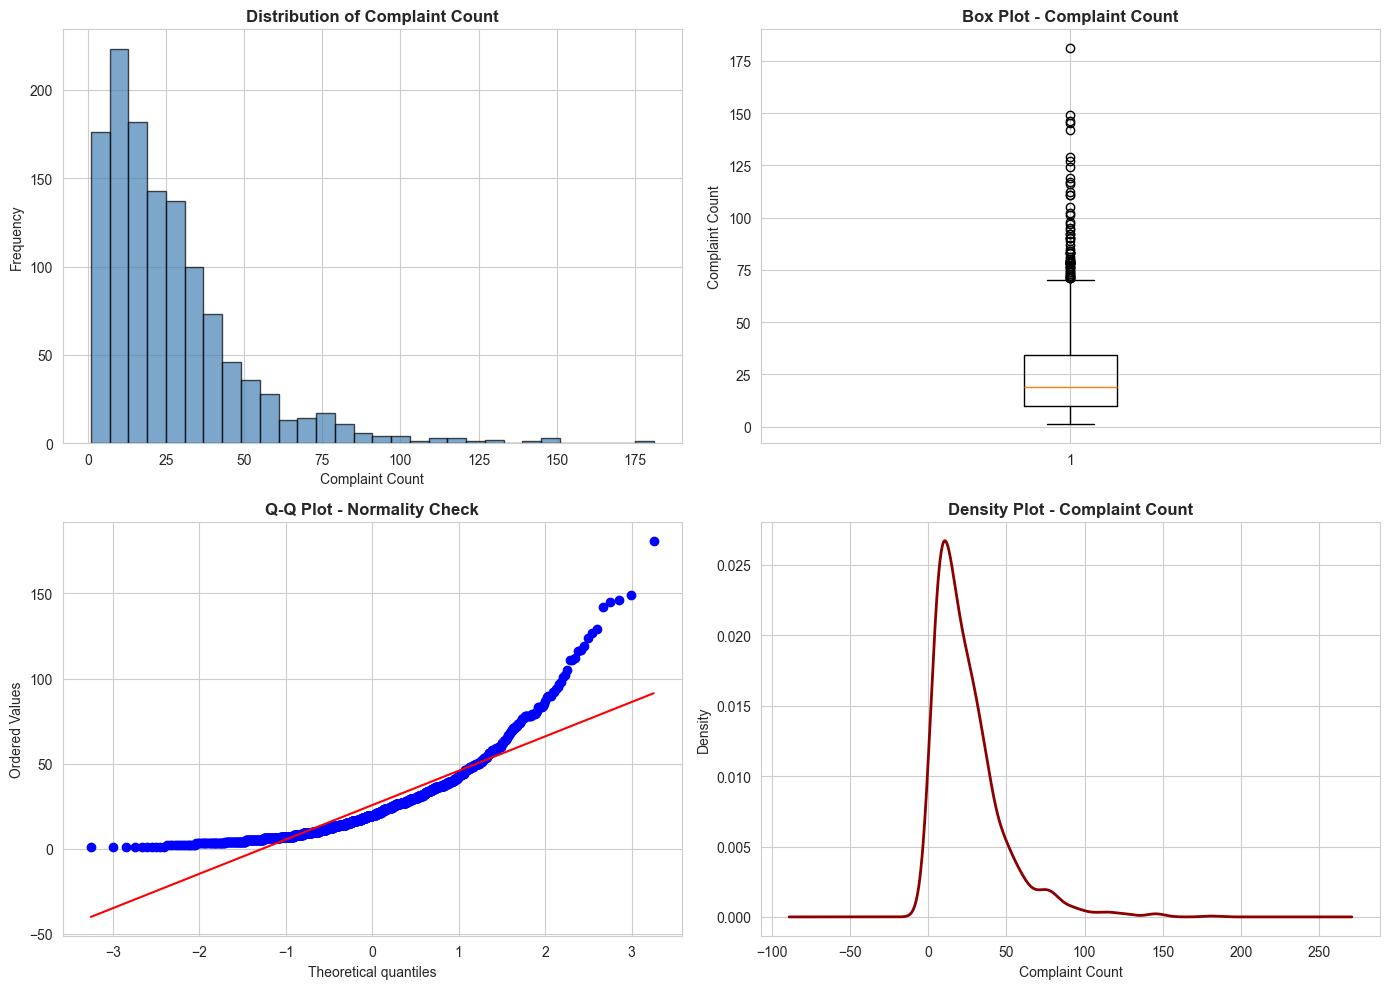

In [227]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 12)

# --- 1. Distribution of Complaint Count ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram with KDE
axes[0, 0].hist(final_df['Complaint_Count'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title('Distribution of Complaint Count', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Complaint Count')
axes[0, 0].set_ylabel('Frequency')

# Box plot
axes[0, 1].boxplot(final_df['Complaint_Count'], vert=True)
axes[0, 1].set_title('Box Plot - Complaint Count', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Complaint Count')
# Q-Q Plot
from scipy import stats
stats.probplot(final_df['Complaint_Count'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Normality Check', fontsize=12, fontweight='bold')

# Density Plot
final_df['Complaint_Count'].plot(kind='density', ax=axes[1, 1], color='darkred', linewidth=2)
axes[1, 1].set_title('Density Plot - Complaint Count', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Complaint Count')

plt.tight_layout()
plt.show()

In [228]:
# Summary Statistics
print("=" * 60)
print("UNIVARIATE STATISTICS - Complaint Count")
print("=" * 60)
print(final_df['Complaint_Count'].describe())
print(f"Skewness: {final_df['Complaint_Count'].skew():.3f}")
print(f"Kurtosis: {final_df['Complaint_Count'].kurtosis():.3f}")
print()

UNIVARIATE STATISTICS - Complaint Count
count    1228.000000
mean       25.571661
std        22.271619
min         1.000000
25%        10.000000
50%        19.000000
75%        34.000000
max       181.000000
Name: Complaint_Count, dtype: float64
Skewness: 2.080
Kurtosis: 6.500



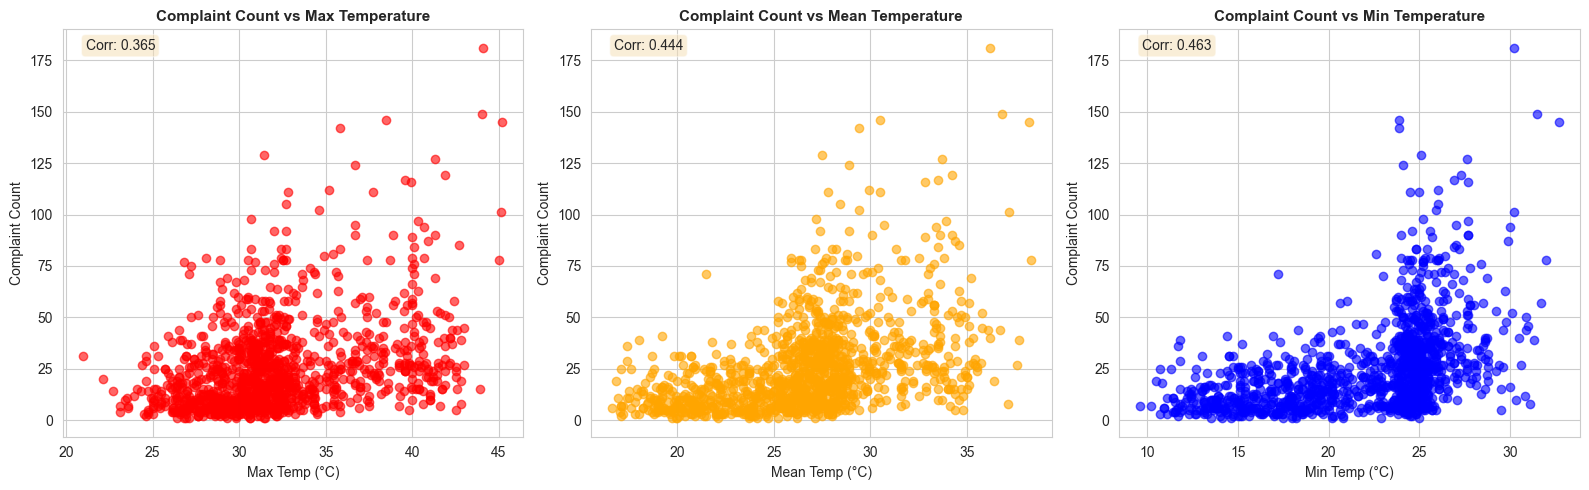

In [229]:
# ============================================================================
# BIVARIATE ANALYSIS - Complaint Count vs Each Feature
# ============================================================================

# --- 2. Complaint Count vs Temperature Features ---
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].scatter(final_df['temp_max_C'], final_df['Complaint_Count'], alpha=0.6, color='red')
axes[0].set_title('Complaint Count vs Max Temperature', fontsize=11, fontweight='bold')
axes[0].set_xlabel('Max Temp (°C)')
axes[0].set_ylabel('Complaint Count')
corr_temp_max = final_df['temp_max_C'].corr(final_df['Complaint_Count'])
axes[0].text(0.05, 0.95, f'Corr: {corr_temp_max:.3f}', transform=axes[0].transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[1].scatter(final_df['temp_mean_C'], final_df['Complaint_Count'], alpha=0.6, color='orange')
axes[1].set_title('Complaint Count vs Mean Temperature', fontsize=11, fontweight='bold')
axes[1].set_xlabel('Mean Temp (°C)')
axes[1].set_ylabel('Complaint Count')
corr_temp_mean = final_df['temp_mean_C'].corr(final_df['Complaint_Count'])
axes[1].text(0.05, 0.95, f'Corr: {corr_temp_mean:.3f}', transform=axes[1].transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[2].scatter(final_df['temp_min_C'], final_df['Complaint_Count'], alpha=0.6, color='blue')
axes[2].set_title('Complaint Count vs Min Temperature', fontsize=11, fontweight='bold')
axes[2].set_xlabel('Min Temp (°C)')
axes[2].set_ylabel('Complaint Count')
corr_temp_min = final_df['temp_min_C'].corr(final_df['Complaint_Count'])
axes[2].text(0.05, 0.95, f'Corr: {corr_temp_min:.3f}', transform=axes[2].transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

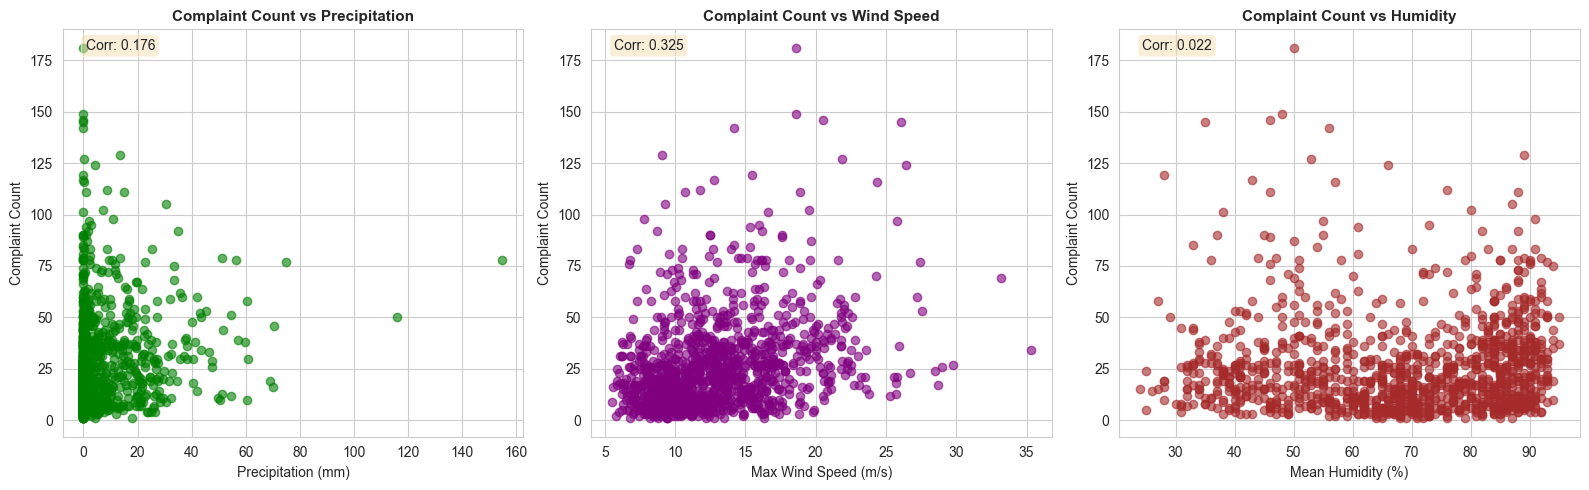

In [230]:
# --- 3. Complaint Count vs Weather Features ---
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].scatter(final_df['precip_mm'], final_df['Complaint_Count'], alpha=0.6, color='green')
axes[0].set_title('Complaint Count vs Precipitation', fontsize=11, fontweight='bold')
axes[0].set_xlabel('Precipitation (mm)')
axes[0].set_ylabel('Complaint Count')
corr_precip = final_df['precip_mm'].corr(final_df['Complaint_Count'])
axes[0].text(0.05, 0.95, f'Corr: {corr_precip:.3f}', transform=axes[0].transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[1].scatter(final_df['wind_speed_max_m_s'], final_df['Complaint_Count'], alpha=0.6, color='purple')
axes[1].set_title('Complaint Count vs Wind Speed', fontsize=11, fontweight='bold')
axes[1].set_xlabel('Max Wind Speed (m/s)')
axes[1].set_ylabel('Complaint Count')
corr_wind = final_df['wind_speed_max_m_s'].corr(final_df['Complaint_Count'])
axes[1].text(0.05, 0.95, f'Corr: {corr_wind:.3f}', transform=axes[1].transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[2].scatter(final_df['relative_humidity_2m_mean'], final_df['Complaint_Count'], alpha=0.6, color='brown')
axes[2].set_title('Complaint Count vs Humidity', fontsize=11, fontweight='bold')
axes[2].set_xlabel('Mean Humidity (%)')
axes[2].set_ylabel('Complaint Count')
corr_humidity = final_df['relative_humidity_2m_mean'].corr(final_df['Complaint_Count'])
axes[2].text(0.05, 0.95, f'Corr: {corr_humidity:.3f}', transform=axes[2].transAxes,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

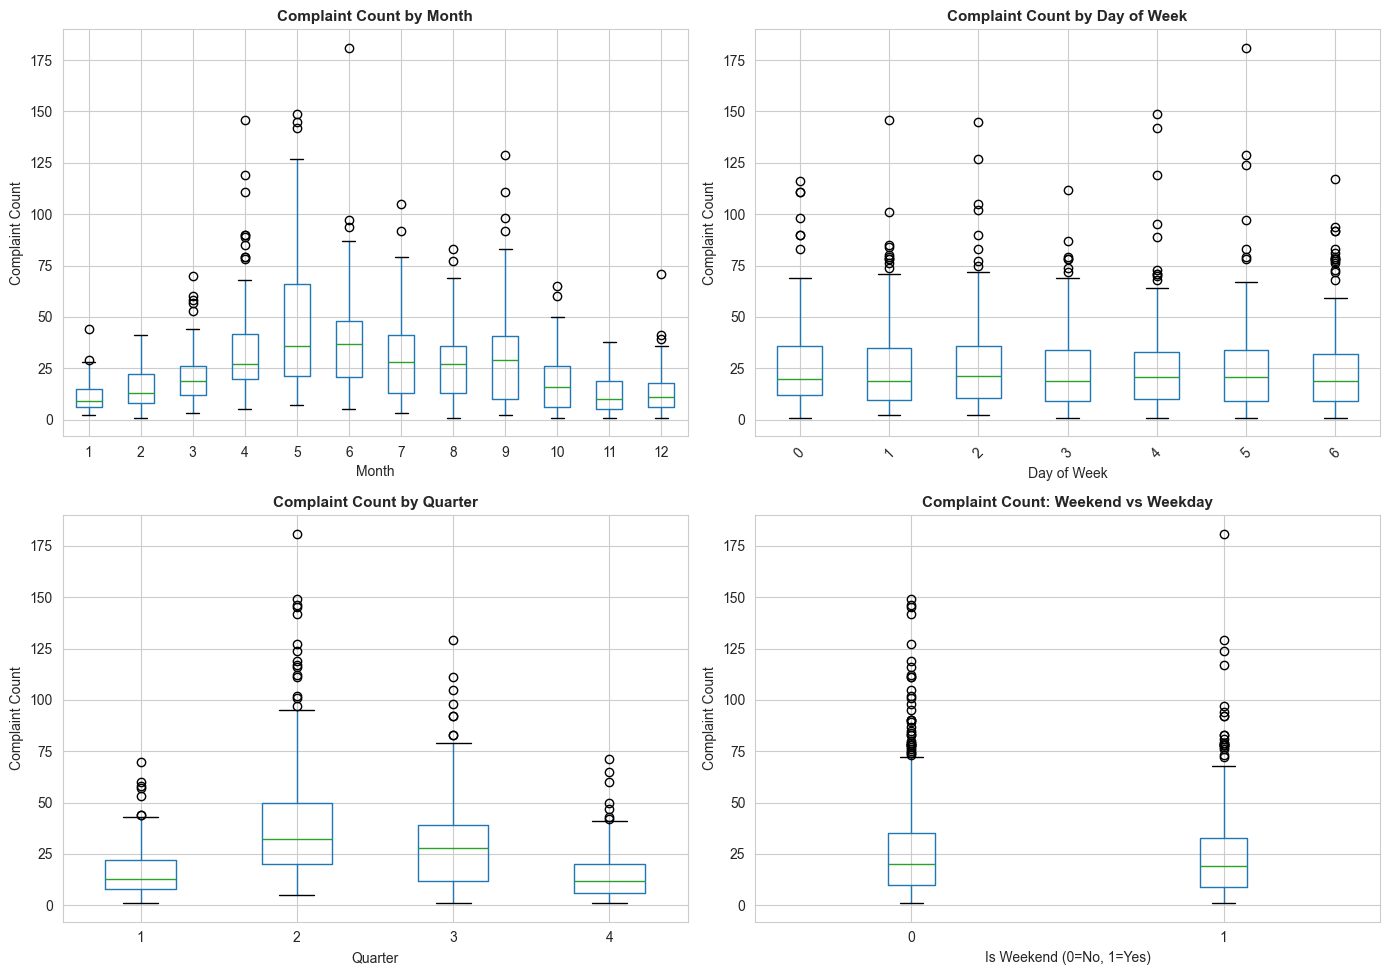

In [231]:
# --- 4. Complaint Count vs Temporal Features ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

final_df.boxplot(column='Complaint_Count', by='month', ax=axes[0, 0])
axes[0, 0].set_title('Complaint Count by Month', fontsize=11, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Complaint Count')
plt.sca(axes[0, 0])
plt.xticks(rotation=0)

final_df.boxplot(column='Complaint_Count', by='day_of_week', ax=axes[0, 1])
axes[0, 1].set_title('Complaint Count by Day of Week', fontsize=11, fontweight='bold')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Complaint Count')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

final_df.boxplot(column='Complaint_Count', by='quarter', ax=axes[1, 0])
axes[1, 0].set_title('Complaint Count by Quarter', fontsize=11, fontweight='bold')
axes[1, 0].set_xlabel('Quarter')
axes[1, 0].set_ylabel('Complaint Count')

final_df.boxplot(column='Complaint_Count', by='is_weekend', ax=axes[1, 1])
axes[1, 1].set_title('Complaint Count: Weekend vs Weekday', fontsize=11, fontweight='bold')
axes[1, 1].set_xlabel('Is Weekend (0=No, 1=Yes)')
axes[1, 1].set_ylabel('Complaint Count')

plt.suptitle('')
plt.tight_layout()

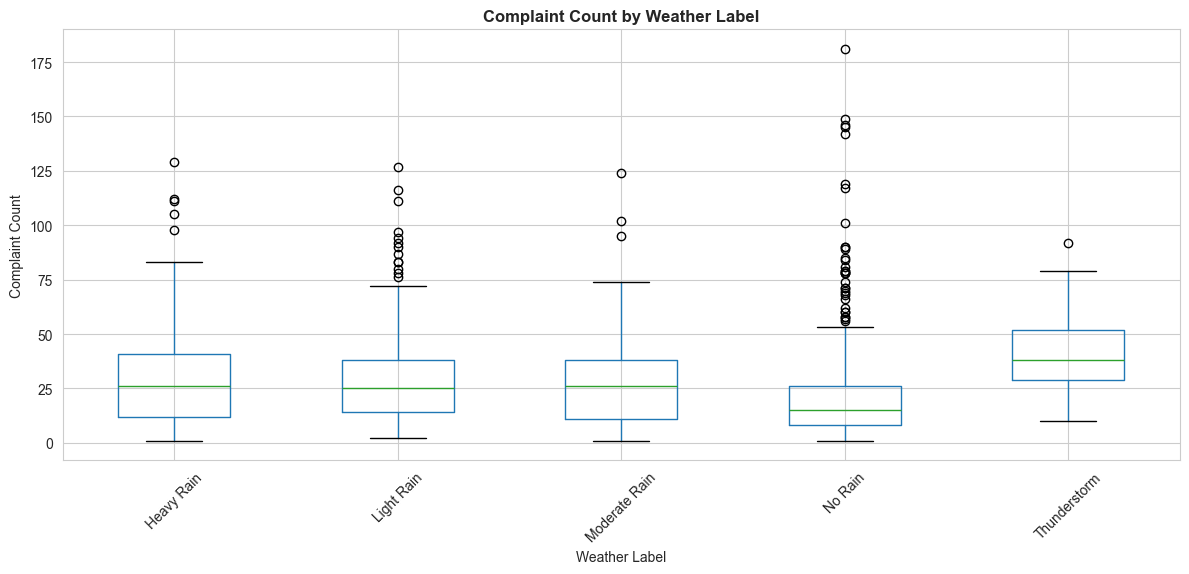


BIVARIATE CORRELATIONS WITH COMPLAINT COUNT
temp_max_C..............................   0.3653
temp_min_C..............................   0.4626
temp_mean_C.............................   0.4438
precip_mm...............................   0.1763
wind_speed_max_m_s......................   0.3249
weather_code............................   0.2299
day_of_week.............................  -0.0186
day_of_month............................   0.0282
week_of_year............................  -0.0477
month...................................  -0.0574
quarter.................................  -0.0726
year....................................   0.5399
day_of_year.............................  -0.0559
is_weekend..............................  -0.0160
relative_humidity_2m_mean...............   0.0223



In [232]:
# --- 5. Complaint Count vs Weather Label ---
fig, ax = plt.subplots(figsize=(12, 6))
final_df.boxplot(column='Complaint_Count', by='weather_label', ax=ax)
ax.set_title('Complaint Count by Weather Label', fontsize=12, fontweight='bold')
ax.set_xlabel('Weather Label')
ax.set_ylabel('Complaint Count')
plt.suptitle('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("BIVARIATE CORRELATIONS WITH COMPLAINT COUNT")
print("=" * 60)
numeric_cols = final_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col != 'Complaint_Count':
        corr = final_df[col].corr(final_df['Complaint_Count'])
        print(f"{col:.<40} {corr:>8.4f}")
print()

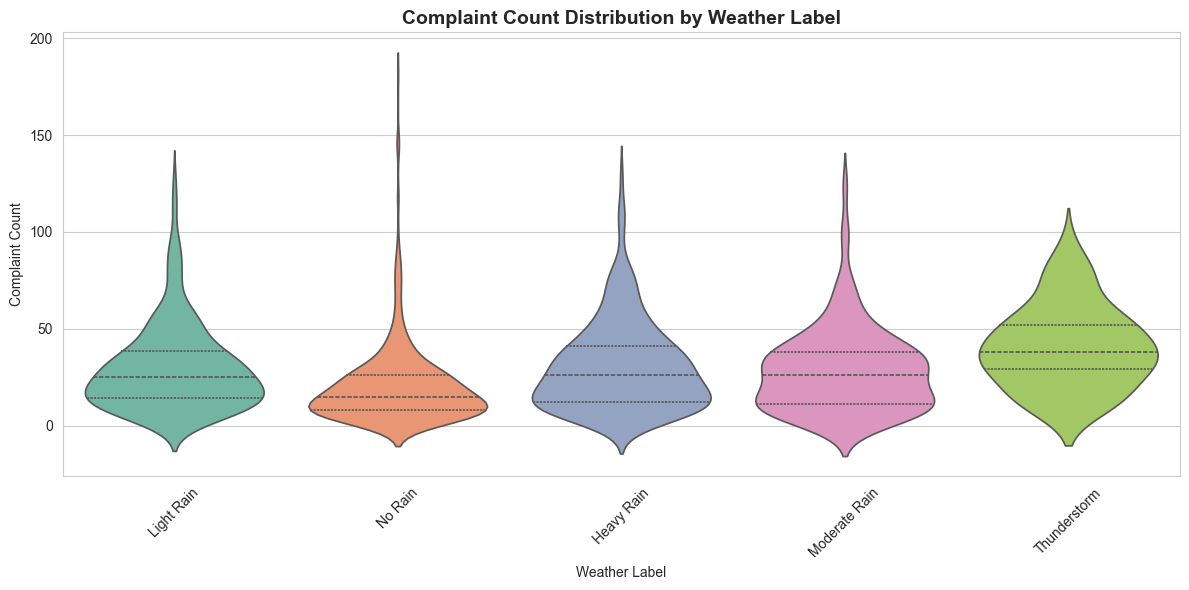

In [233]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=final_df, x='weather_label', y='Complaint_Count', palette='Set2', inner='quartile')
plt.title('Complaint Count Distribution by Weather Label', fontsize=14, fontweight='bold')
plt.xlabel('Weather Label')
plt.ylabel('Complaint Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

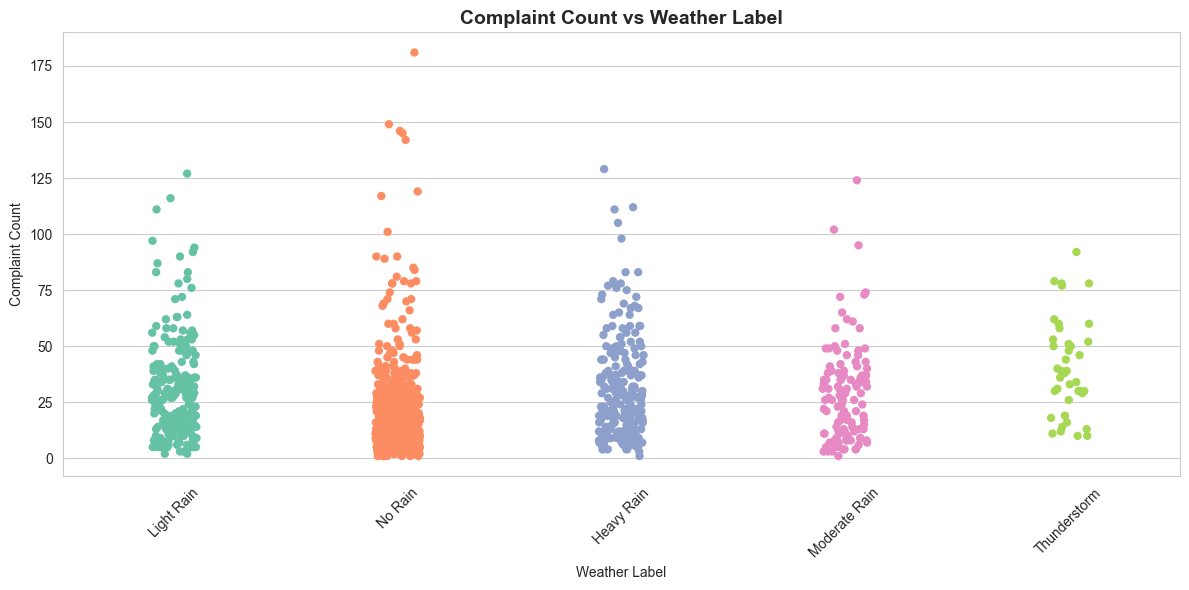

In [234]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=final_df, x='weather_label', y='Complaint_Count', jitter=True, palette='Set2', size=6)
plt.title('Complaint Count vs Weather Label', fontsize=14, fontweight='bold')
plt.xlabel('Weather Label')
plt.ylabel('Complaint Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

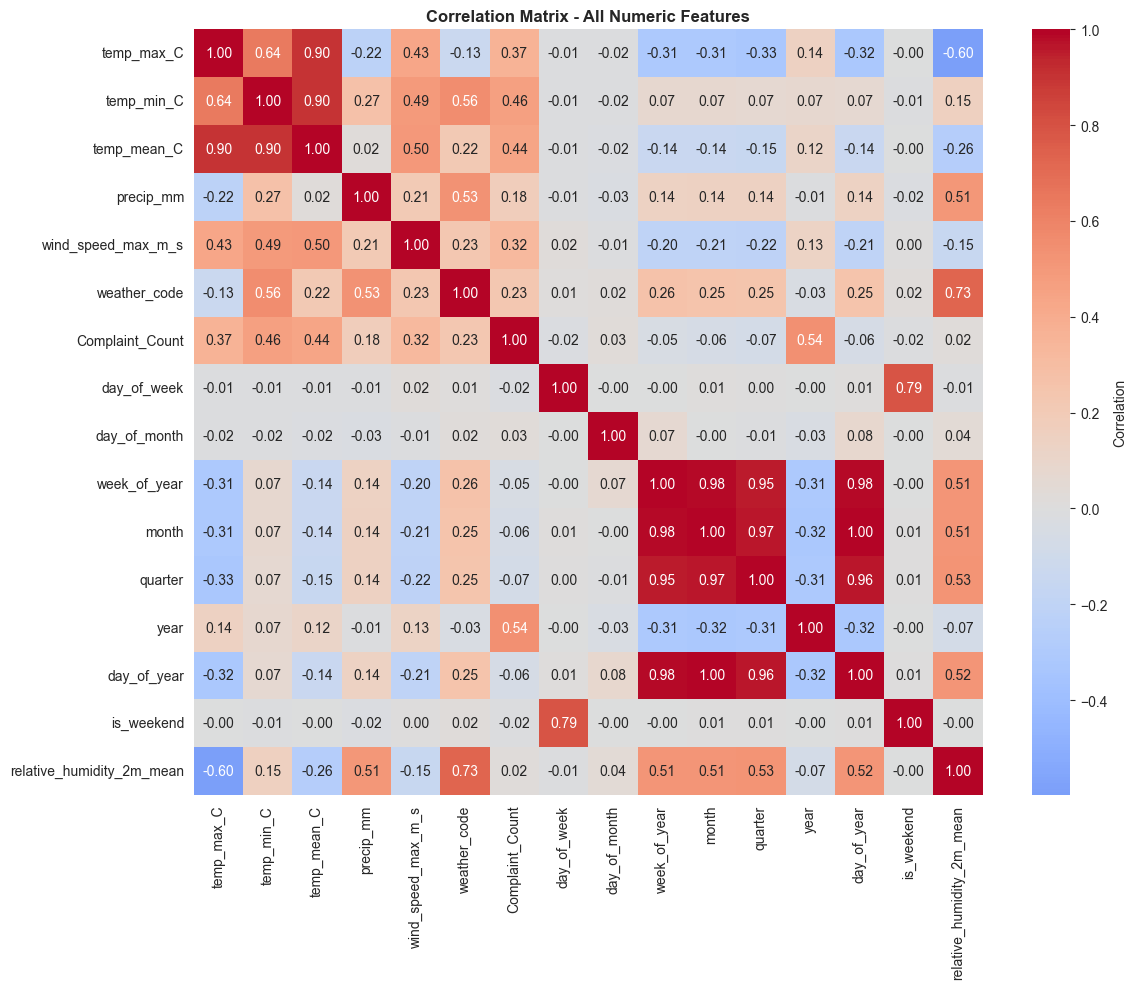

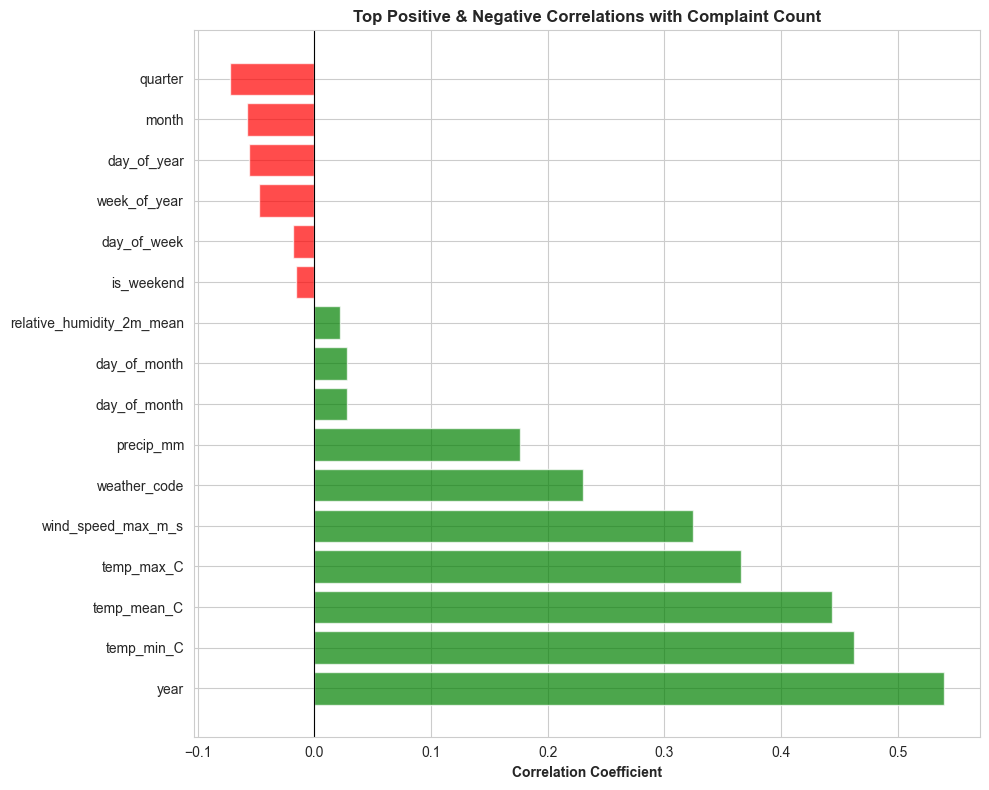

In [235]:
# ============================================================================
# MULTIVARIATE ANALYSIS - Multiple Features vs Complaint Count
# ============================================================================

# --- 6. Correlation Heatmap ---
fig, ax = plt.subplots(figsize=(12, 10))
numeric_df = final_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Correlation Matrix - All Numeric Features', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# --- 7. Top Correlations with Complaint Count ---
fig, ax = plt.subplots(figsize=(10, 8))
correlations = numeric_df.corr()['Complaint_Count'].drop('Complaint_Count').sort_values(ascending=False)
top_corr = pd.concat([correlations.head(8), correlations.tail(8)])
colors = ['green' if x > 0 else 'red' for x in top_corr.values]
ax.barh(range(len(top_corr)), top_corr.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(top_corr)))
ax.set_yticklabels(top_corr.index)
ax.set_xlabel('Correlation Coefficient', fontweight='bold')
ax.set_title('Top Positive & Negative Correlations with Complaint Count', fontsize=12, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.show()

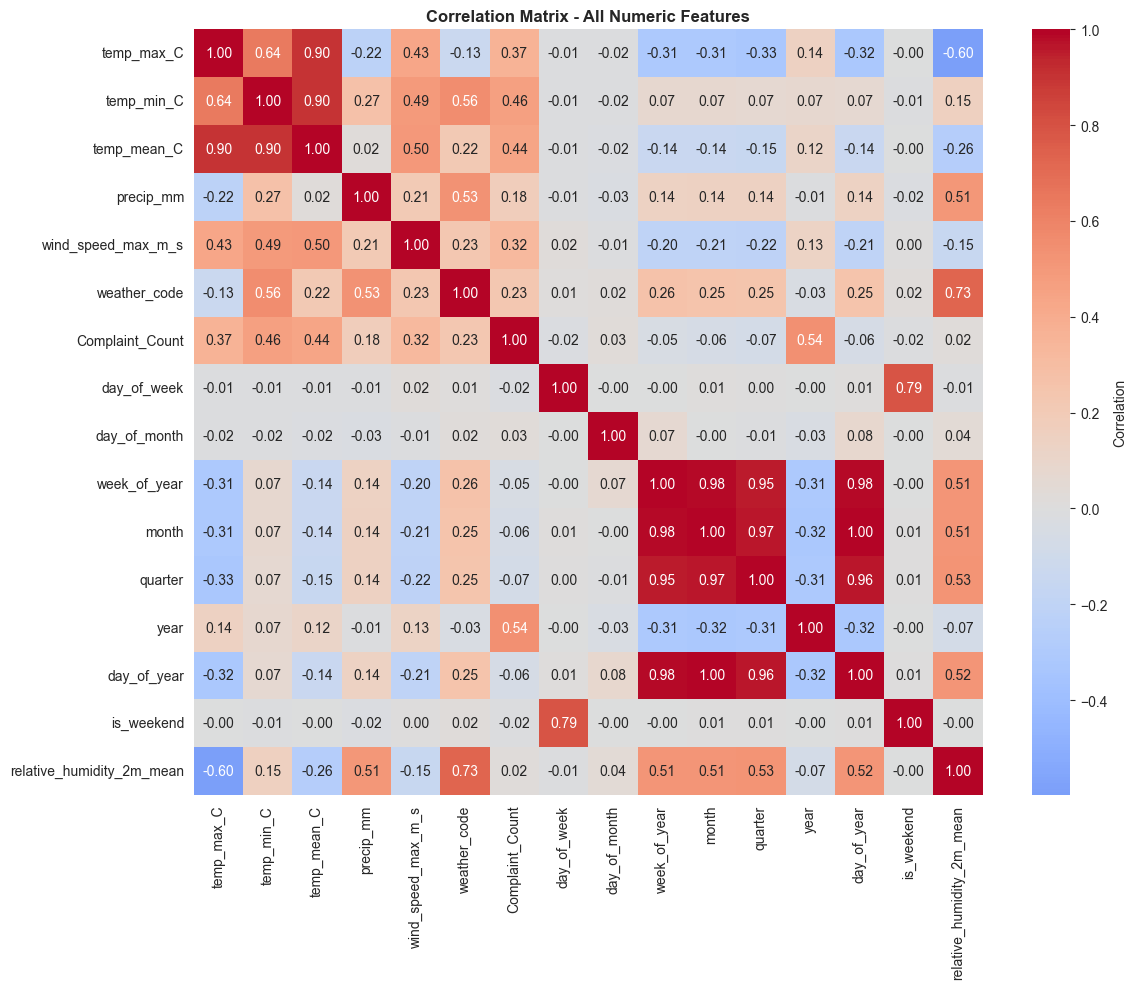

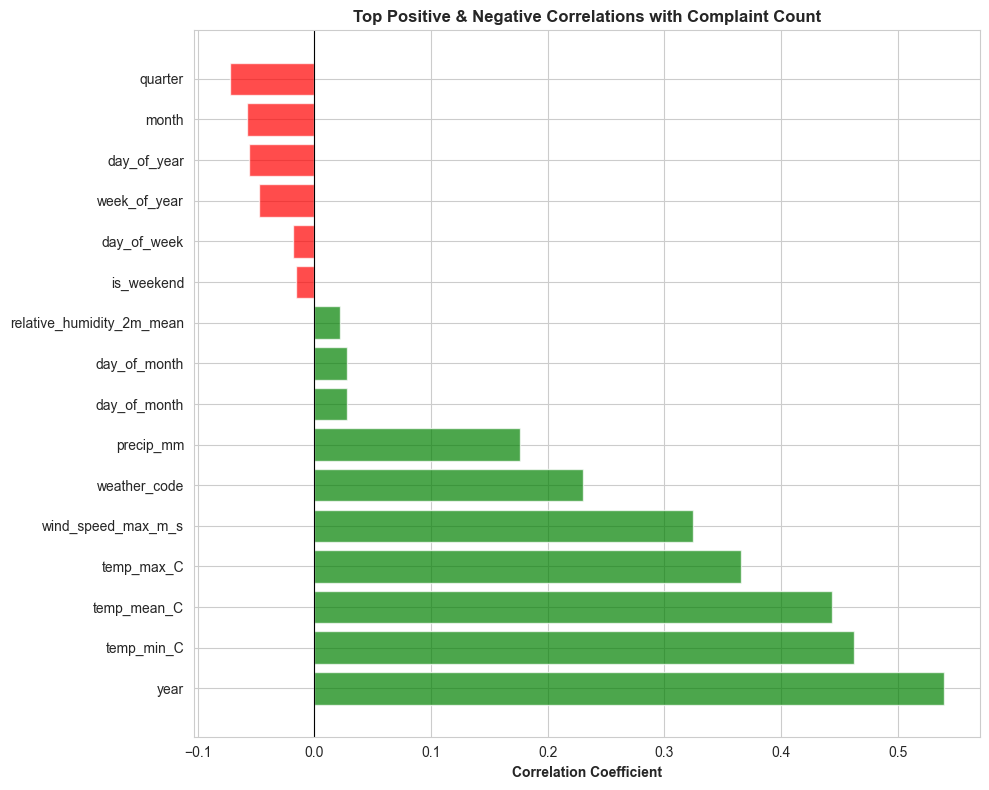

<Figure size 1400x1000 with 0 Axes>

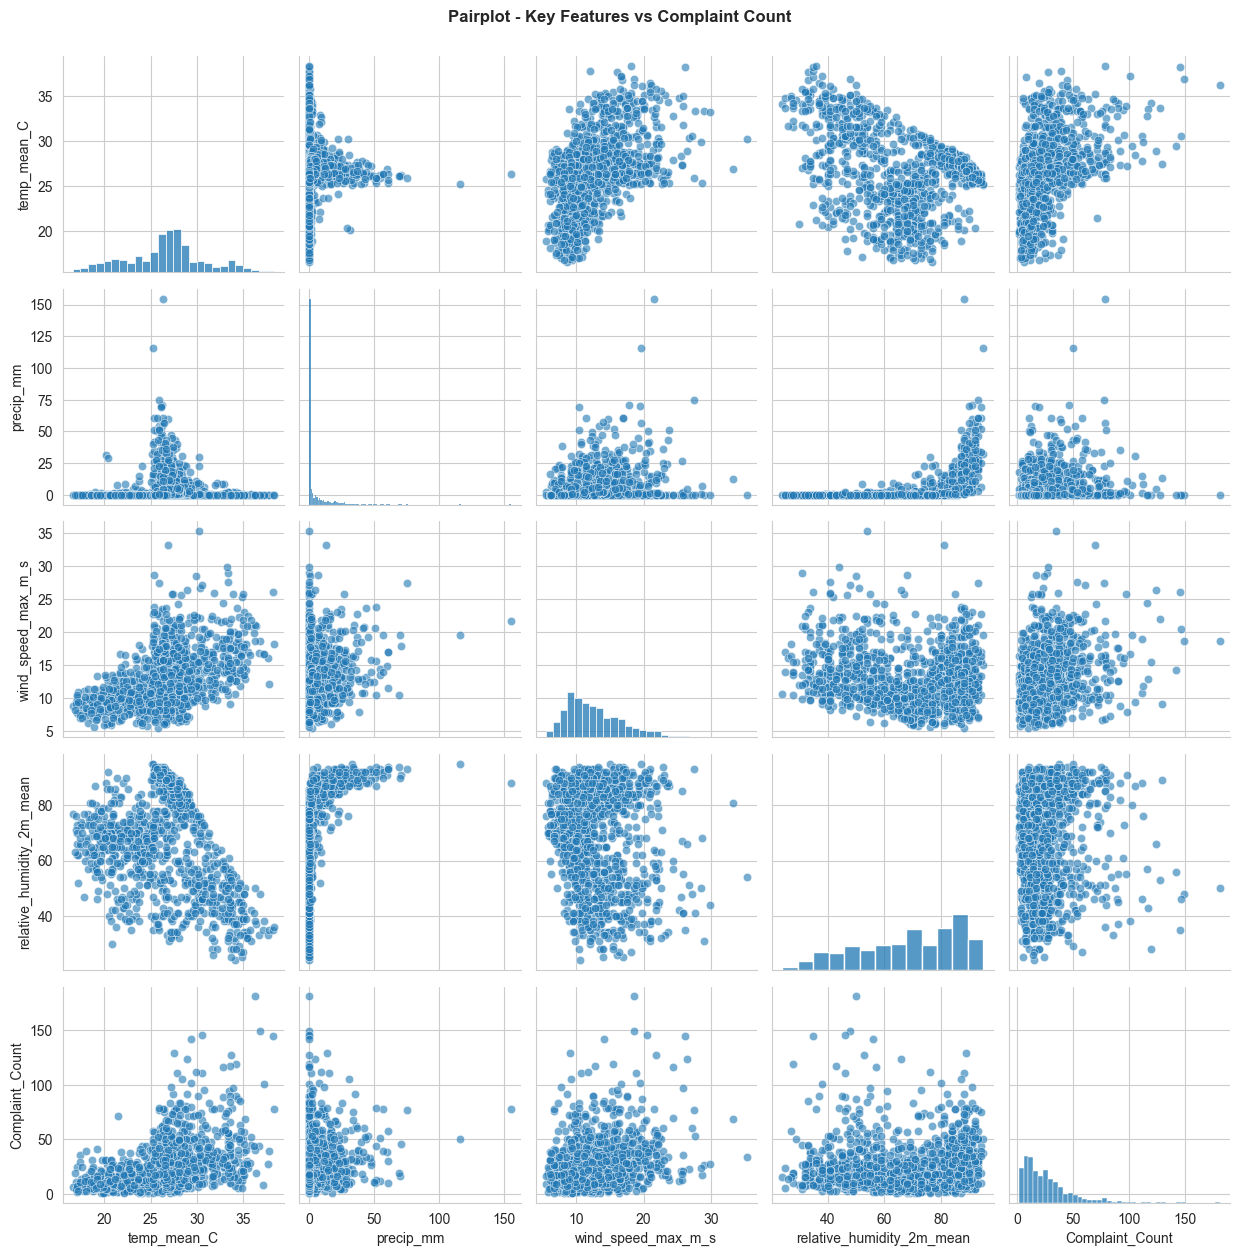

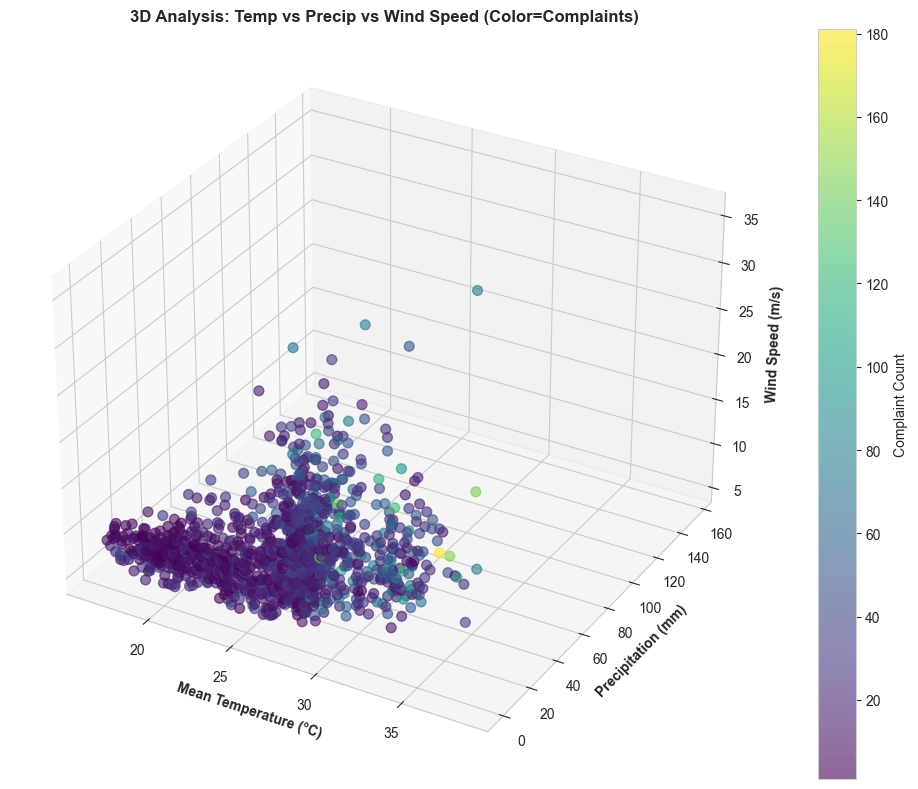

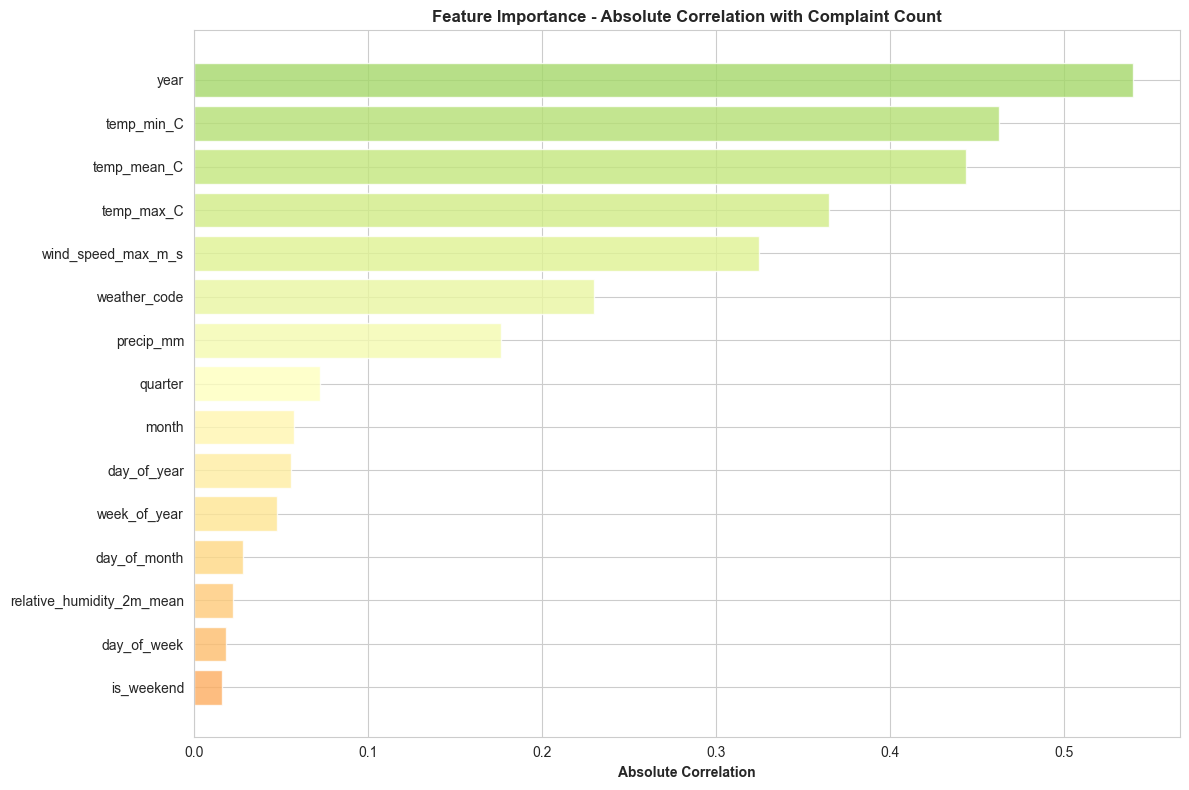

In [237]:
# ============================================================================
# MULTIVARIATE ANALYSIS - Multiple Features vs Complaint Count
# ============================================================================

# --- 6. Correlation Heatmap ---
fig, ax = plt.subplots(figsize=(12, 10))
numeric_df = final_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Correlation Matrix - All Numeric Features', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# --- 7. Top Correlations with Complaint Count ---
fig, ax = plt.subplots(figsize=(10, 8))
correlations = numeric_df.corr()['Complaint_Count'].drop('Complaint_Count').sort_values(ascending=False)
top_corr = pd.concat([correlations.head(8), correlations.tail(8)])
colors = ['green' if x > 0 else 'red' for x in top_corr.values]
ax.barh(range(len(top_corr)), top_corr.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(top_corr)))
ax.set_yticklabels(top_corr.index)
ax.set_xlabel('Correlation Coefficient', fontweight='bold')
ax.set_title('Top Positive & Negative Correlations with Complaint Count', fontsize=12, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.show()

# --- 8. Pairplot - Key Features ---
fig = plt.figure(figsize=(14, 10))
key_features = ['temp_mean_C', 'precip_mm', 'wind_speed_max_m_s', 
                'relative_humidity_2m_mean', 'Complaint_Count']
sns.pairplot(final_df[key_features], diag_kind='hist', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot - Key Features vs Complaint Count', fontsize=12, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

# --- 9. 3D Scatter Plot ---
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(final_df['temp_mean_C'], final_df['precip_mm'], 
                     final_df['wind_speed_max_m_s'], 
                     c=final_df['Complaint_Count'], cmap='viridis', s=50, alpha=0.6)
ax.set_xlabel('Mean Temperature (°C)', fontweight='bold')
ax.set_ylabel('Precipitation (mm)', fontweight='bold')
ax.set_zlabel('Wind Speed (m/s)', fontweight='bold')
ax.set_title('3D Analysis: Temp vs Precip vs Wind Speed (Color=Complaints)', fontweight='bold')
plt.colorbar(scatter, ax=ax, label='Complaint Count')
plt.tight_layout()
plt.show()

# --- 10. Feature Importance via Correlation Strength ---
fig, ax = plt.subplots(figsize=(12, 8))
abs_corr = numeric_df.corr()['Complaint_Count'].drop('Complaint_Count').abs().sort_values(ascending=True)
colors_importance = plt.cm.RdYlGn(np.linspace(0.3, 0.7, len(abs_corr)))
ax.barh(range(len(abs_corr)), abs_corr.values, color=colors_importance, alpha=0.8)
ax.set_yticks(range(len(abs_corr)))
ax.set_yticklabels(abs_corr.index)
ax.set_xlabel('Absolute Correlation', fontweight='bold')
ax.set_title('Feature Importance - Absolute Correlation with Complaint Count', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()



In [238]:
final_df.columns

Index(['time', 'temp_max_C', 'temp_min_C', 'temp_mean_C', 'precip_mm',
       'wind_speed_max_m_s', 'weather_code', 'Complaint_Count', 'day_of_week',
       'day_of_month', 'week_of_year', 'month', 'quarter', 'year',
       'day_of_year', 'is_weekend', 'relative_humidity_2m_mean',
       'weather_label'],
      dtype='object')

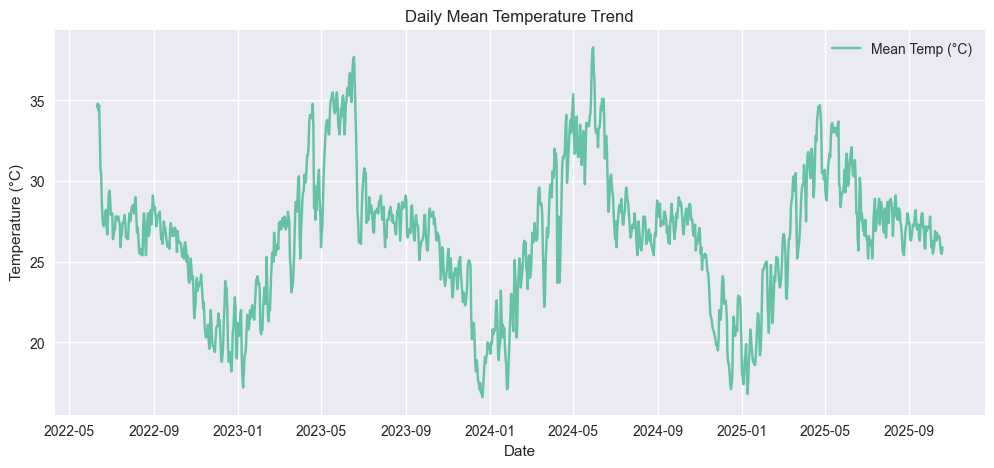

In [240]:
# Optional: for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')
# Line Chart: Daily temperature trend
plt.figure(figsize=(12, 5))
plt.plot(final_df['time'], final_df['temp_mean_C'], label='Mean Temp (°C)')
plt.title('Daily Mean Temperature Trend')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


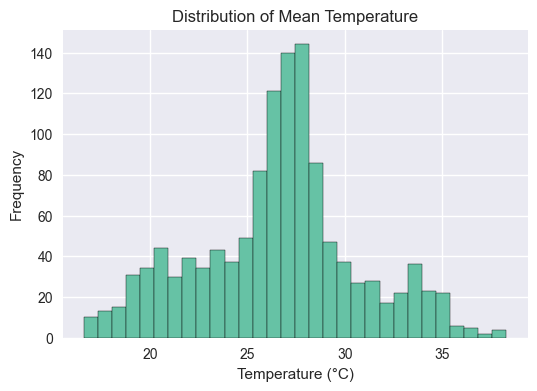

In [241]:
# Histogram: Distribution of mean temperature
plt.figure(figsize=(6, 4))
plt.hist(final_df['temp_mean_C'], bins=30, edgecolor='black')
plt.title('Distribution of Mean Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

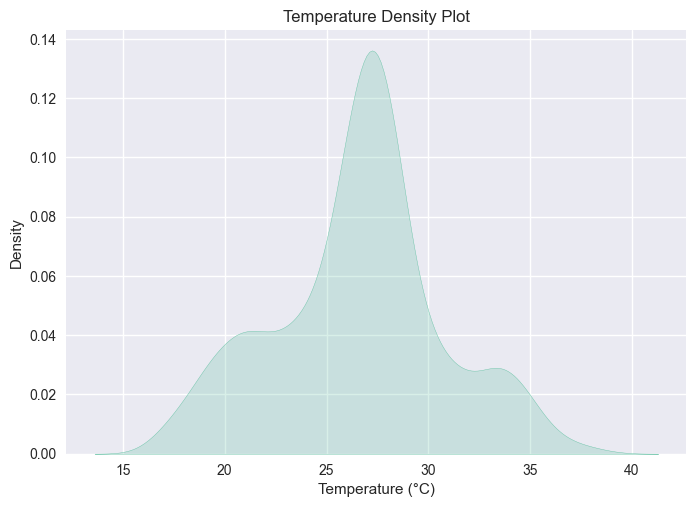

In [242]:
# Density Plot (KDE)
sns.kdeplot(final_df['temp_mean_C'], fill=True)
plt.title('Temperature Density Plot')
plt.xlabel('Temperature (°C)')
plt.show()

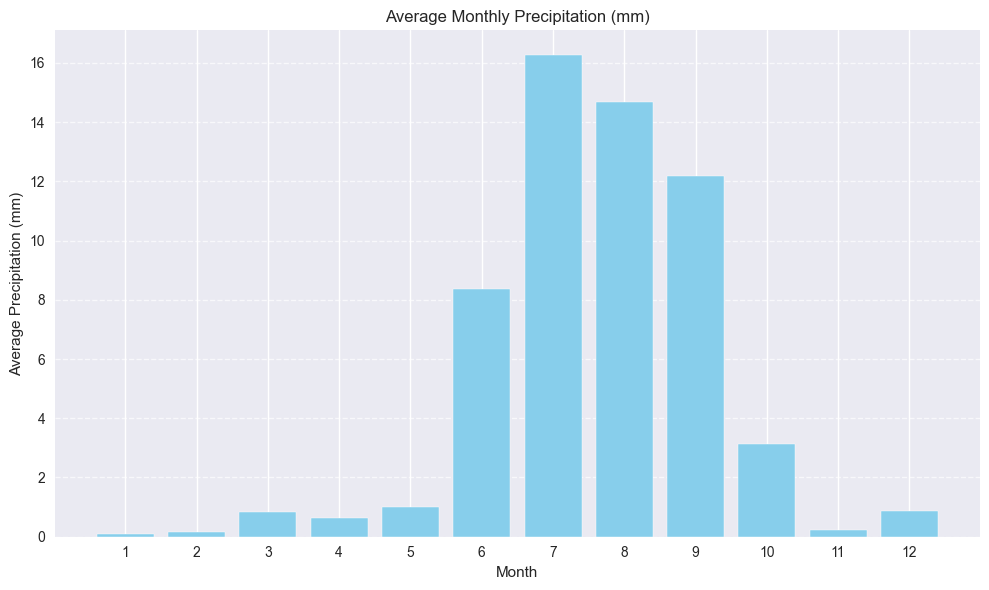

In [244]:
# 1. Calculate the mean precipitation for each month
monthly_precip_mean = final_df.groupby('month')['precip_mm'].mean()

# 2. Use the result's index (months) for the x-axis and values (mean precip) for the height
plt.figure(figsize=(10, 6))
plt.bar(
    monthly_precip_mean.index.astype(str),  # x-axis: Month numbers as strings for clean labels
    monthly_precip_mean.values,             # height: The calculated mean precipitation
    color='skyblue'
)

# 3. Add titles and labels for clarity
plt.title('Average Monthly Precipitation (mm)')
plt.xlabel('Month')
plt.ylabel('Average Precipitation (mm)')
plt.xticks(rotation=0) # Keep x-labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


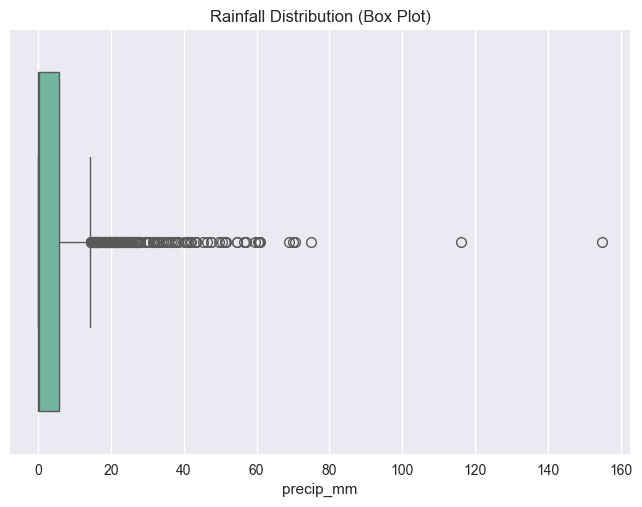

In [245]:
# Box Plot
sns.boxplot(x=final_df['precip_mm'])
plt.title('Rainfall Distribution (Box Plot)')
plt.show()


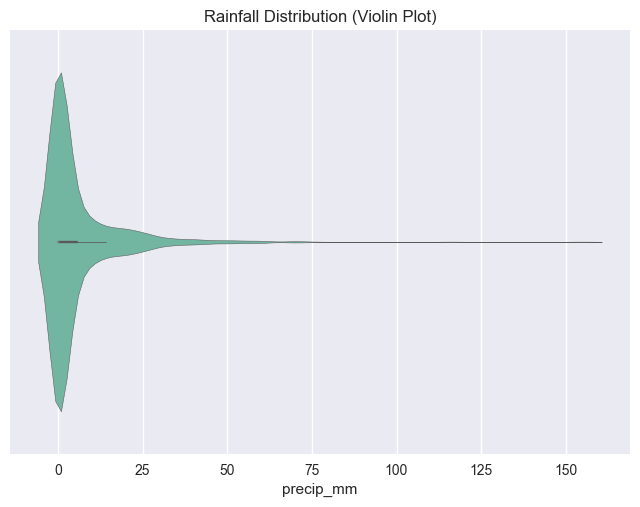

In [246]:
# Violin Plot
sns.violinplot(x=final_df['precip_mm'])
plt.title('Rainfall Distribution (Violin Plot)')
plt.show()

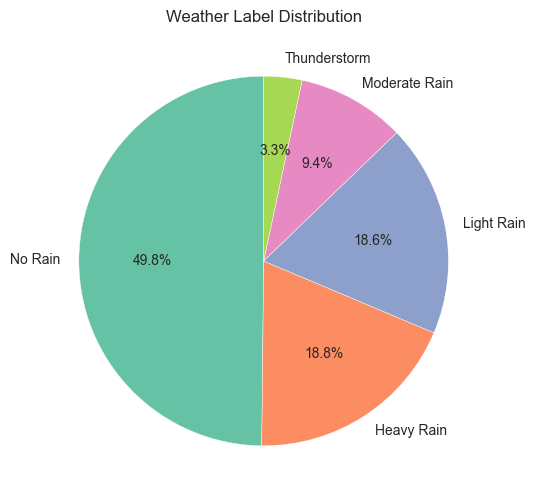

In [247]:
# Pie Chart: Weather Label Distribution
weather_counts = final_df['weather_label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Weather Label Distribution')
plt.show()


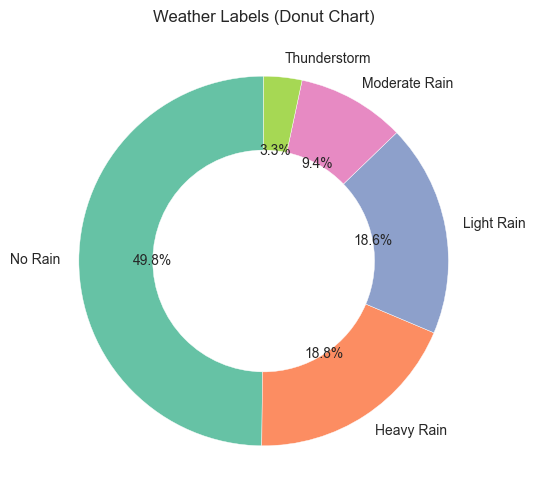

In [248]:
# Donut Chart (Circular)
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90)
plt.setp(wedges, width=0.4)
plt.title('Weather Labels (Donut Chart)')
plt.show()

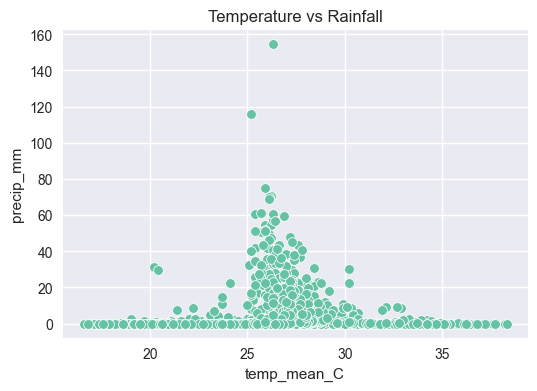

In [249]:
# Temperature vs Rainfall

# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='temp_mean_C', y='precip_mm', data=final_df)
plt.title('Temperature vs Rainfall')
plt.show()

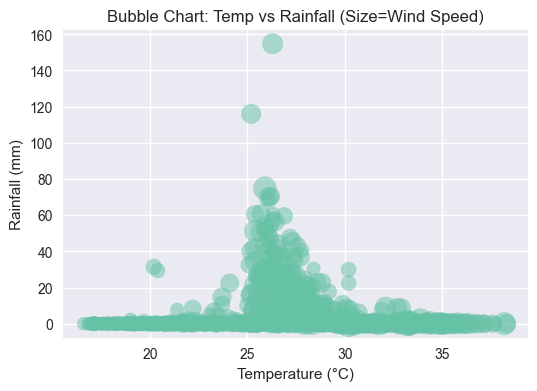

In [250]:
# Bubble Chart (Size = Wind Speed)
plt.figure(figsize=(6, 4))
plt.scatter(final_df['temp_mean_C'], final_df['precip_mm'], 
            s=final_df['wind_speed_max_m_s']*10, alpha=0.5)
plt.title('Bubble Chart: Temp vs Rainfall (Size=Wind Speed)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.show()

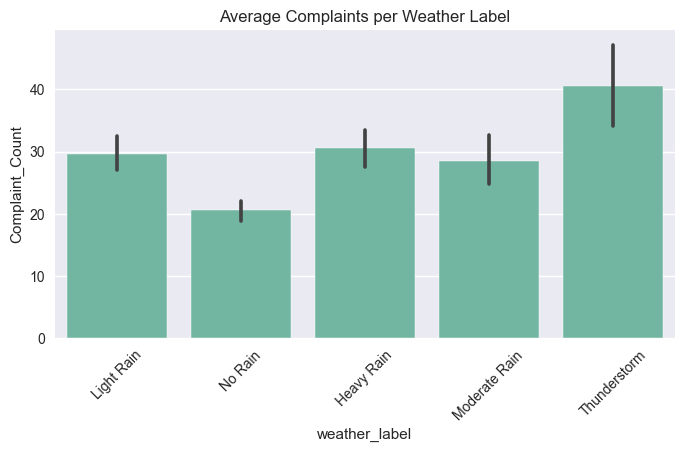

In [251]:
# Weather vs Complaints
# Column Chart
plt.figure(figsize=(8, 4))
sns.barplot(x='weather_label', y='Complaint_Count', data=final_df, estimator='mean')
plt.title('Average Complaints per Weather Label')
plt.xticks(rotation=45)
plt.show()

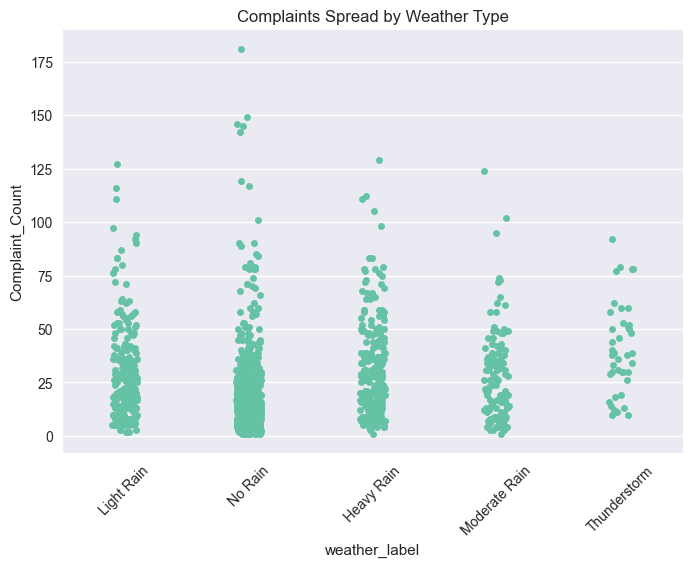

In [252]:
# Strip Plot
sns.stripplot(x='weather_label', y='Complaint_Count', data=final_df, jitter=True)
plt.title('Complaints Spread by Weather Type')
plt.xticks(rotation=45)
plt.show()

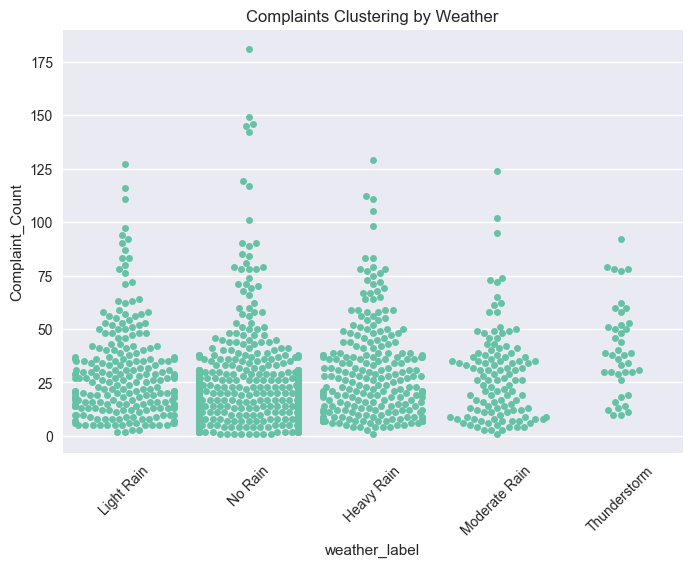

In [253]:
# Swarm Plot
sns.swarmplot(x='weather_label', y='Complaint_Count', data=final_df)
plt.title('Complaints Clustering by Weather')
plt.xticks(rotation=45)
plt.show()

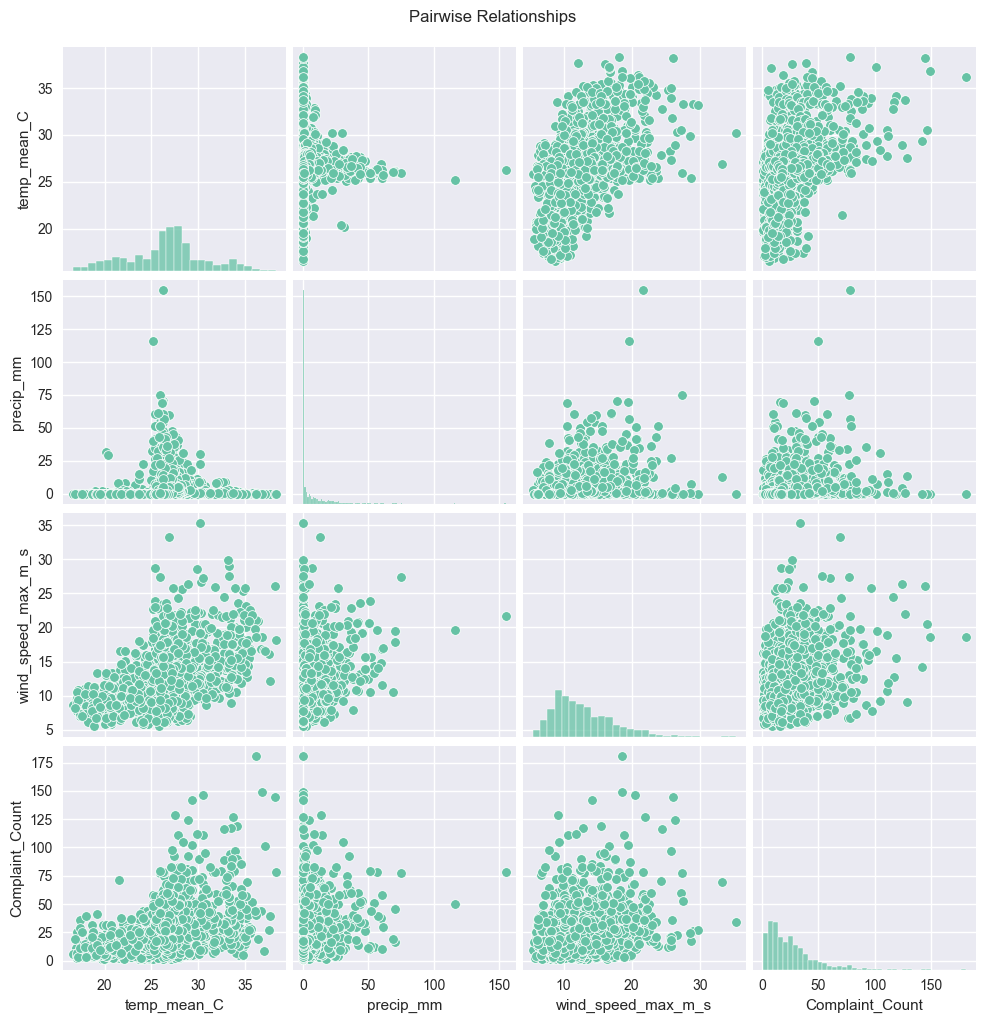

In [254]:
# MULTIVARIATE ANALYSIS (3+ variables together)
# Pair Plot for multiple relationships
sns.pairplot(final_df[['temp_mean_C', 'precip_mm', 'wind_speed_max_m_s', 'Complaint_Count']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

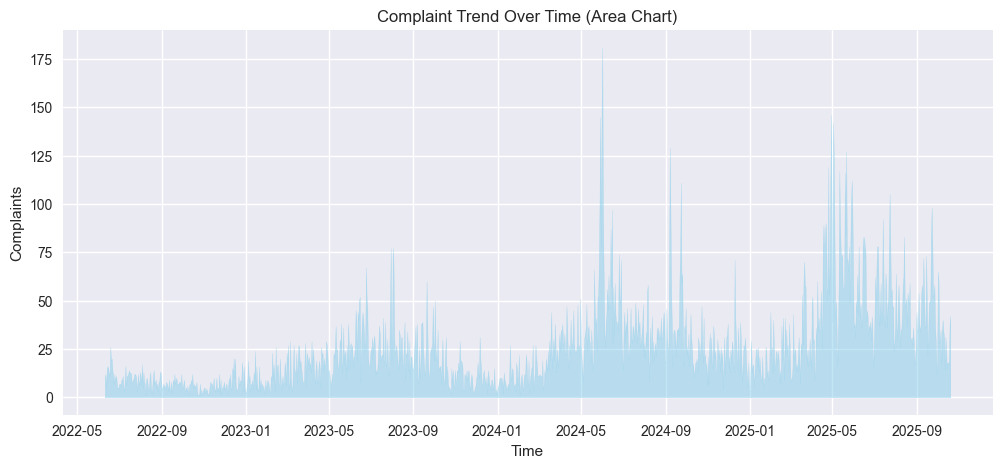

In [255]:
# Time-Series and ECDF Analysis
# Area Chart
plt.figure(figsize=(12, 5))
plt.fill_between(final_df['time'], final_df['Complaint_Count'], color='skyblue', alpha=0.5)
plt.title('Complaint Trend Over Time (Area Chart)')
plt.xlabel('Time')
plt.ylabel('Complaints')
plt.show()

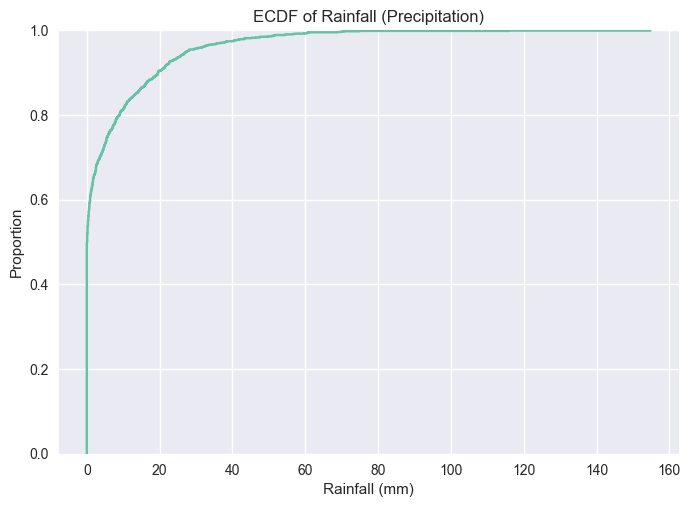

In [256]:
# ECDF Plot
sns.ecdfplot(final_df['precip_mm'])
plt.title('ECDF of Rainfall (Precipitation)')
plt.xlabel('Rainfall (mm)')
plt.show()

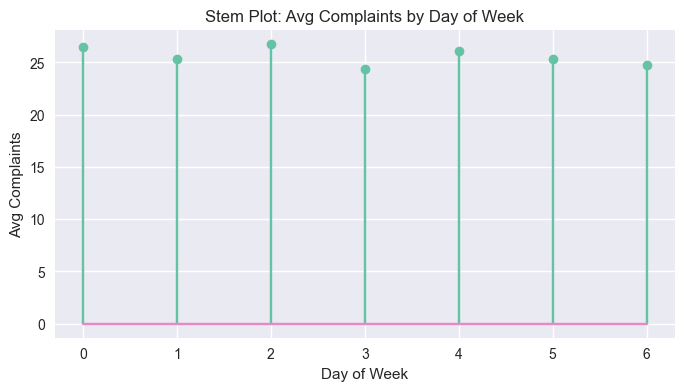

In [257]:
# Stem Plot (for day of week vs mean complaints)
plt.figure(figsize=(8, 4))
plt.stem(final_df.groupby('day_of_week')['Complaint_Count'].mean())
plt.title('Stem Plot: Avg Complaints by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Complaints')
plt.show()